# Game of toss under a bayesian approach

We will model a game of toss under the bayesian approach. We have seen the limits of the frequentist approach in the case when we have just a few tosses (https://docs.google.com/presentation/d/1lO7LImhNxdlEmOkJcYP8ghzPGb3N2tm0Mmm5EBy7yxA/edit?pli=1#slide=id.g7e0e75e1ad_2_40). Indeed, if we toss the coin 3 times and get 3 heads, a frequentist approach would say that the probability of falling on tails is 1. We show here that the bayesian approach is much more flexible.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the gaussian prior
def gaussian(x, mu, sigma):
    return (1 / math.sqrt((2 * math.pi * math.pow(sigma, 2)))) * math.exp(-(1/(2 * math.pow(sigma, 2)))*math.pow(x - mu, 2))

## Modeling and prior distribution

In [3]:
%%latex
We use a bernoulli law to model the problem with a parameter $\theta \in [0, 1]$, the probability of each event is a follows:
$$P(pile|\theta) = \theta$$
$$P(face|\theta) = 1-\theta$$

<IPython.core.display.Latex object>

In [4]:
theta = np.linspace(0, 1)
prior_distribution_theta = [gaussian(t, 0.5, 0.2) for t in theta]

Text(0.5, 0, 'theta')

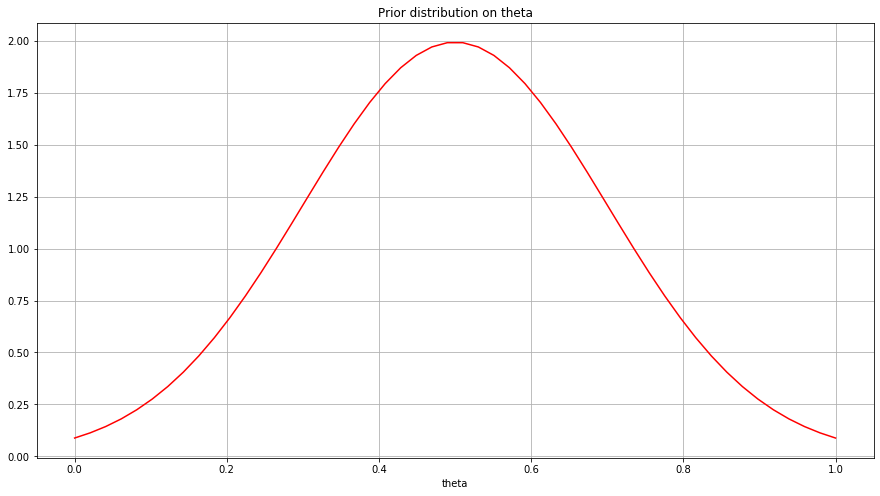

In [5]:
plt.figure(figsize=(15, 8))
plt.plot(theta, prior_distribution_theta, color='r')
plt.grid()
plt.title("Prior distribution on theta")
plt.xlabel("theta")

## Likelihood

In [6]:
%%latex
The likelihood of an event is the probability of observing said event under the assumption on the value of $\theta$.
As the value of $\theta$ gets closer to 1, it gets more likely that the coin falls on tails, hence the likelihood is an increasing function of $\theta$ for the event "coin falls on tails", and a decreasing function for the event "coin falls on heads"

<IPython.core.display.Latex object>

In [7]:
def P(pile, theta):
    return math.pow(theta, pile) * math.pow(1 - theta, 1 - pile)

def get_likelihood(n_pile, n_face, theta):
    return math.pow(theta, n_pile) * math.pow(1 - theta, n_face)

Text(0.5, 0, 'theta')

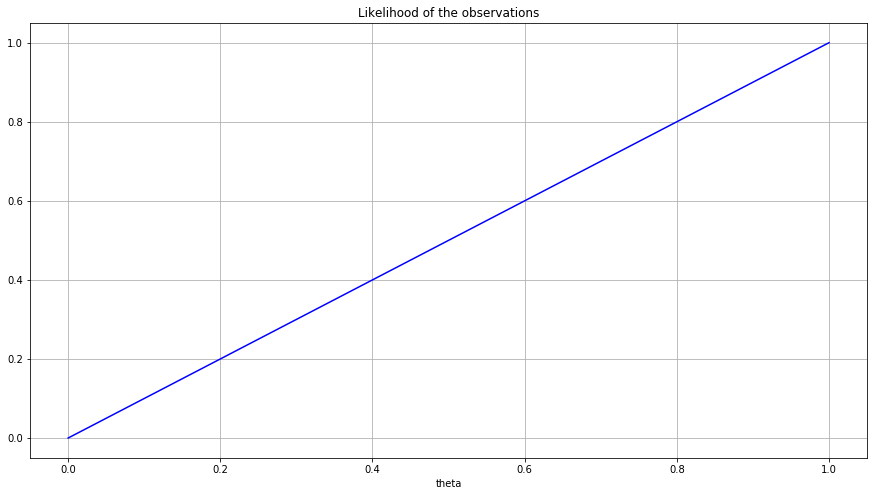

In [8]:
likelihood = [get_likelihood(1, 0, t) for t in theta]
plt.figure(figsize=(15, 8))
plt.plot(theta, likelihood, color='b')
plt.grid()
plt.title("Likelihood of the observations")
plt.xlabel("theta")

## Posterior of the parameter distribution after one update

After one step of bayes rule, we obtain the posterior on our parameter, this will be the new prior for a further iteration. Thus we update the distribution of the parameter with each observation

In [9]:
def one_step_bayes(likelihood, prior_distribution_theta, theta):
    posterior_distribution_theta = [l * t for l, t in zip(likelihood, prior_distribution_theta)]
    posterior_distribution_theta /= np.sum(posterior_distribution_theta)
    return posterior_distribution_theta

In [10]:
likelihood = [get_likelihood(1, 0, t) for t in theta]
posterior_distribution_theta = one_step_bayes(likelihood, prior_distribution_theta ,theta)

Text(0.5, 0, 'theta')

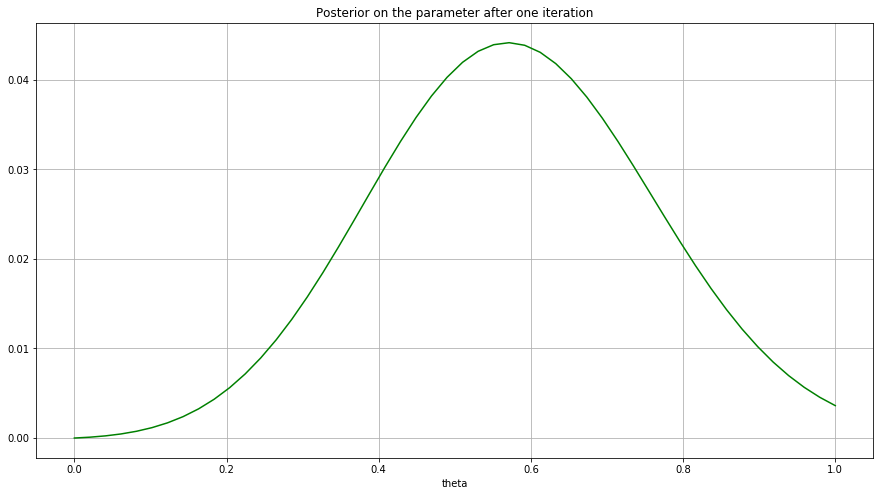

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(theta, posterior_distribution_theta, color='g')
plt.grid()
plt.title("Posterior on the parameter after one iteration")
plt.xlabel("theta")

## Let's plug everything together !

Let's do multiple bayesian updates on multiple tosses. The distribution's mean of the parameter should shift toward the most frequent event in the dataset (shift to 0 if the more heads, 1 otherwise), and the variance should decrease with each observation

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 0
The coin fell on...heads !


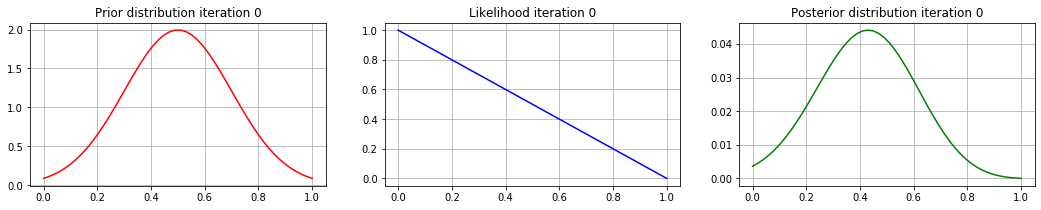

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 1
The coin fell on...heads !


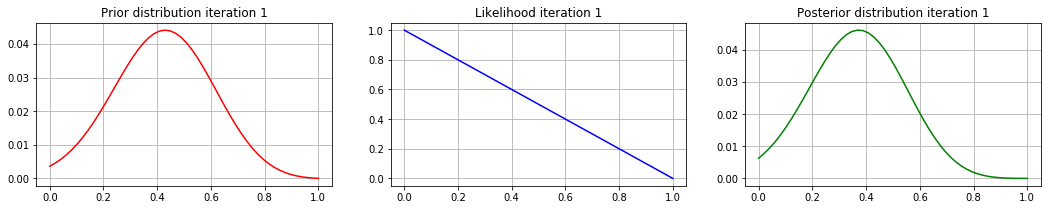

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 2
The coin fell on...heads !


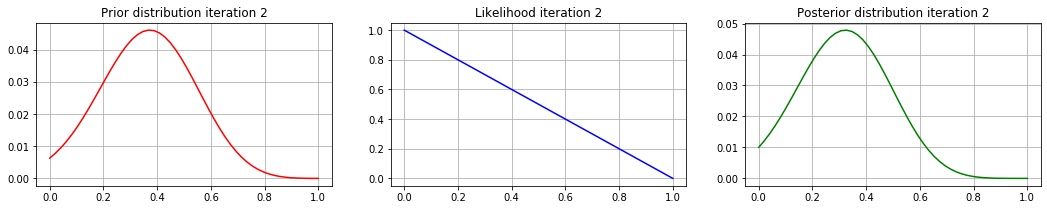

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 3
The coin fell on...heads !


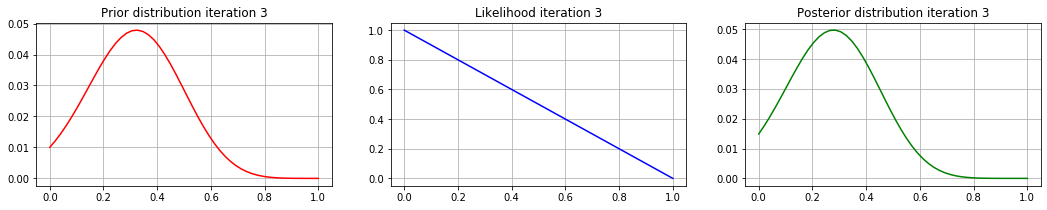

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 4
The coin fell on...tails !


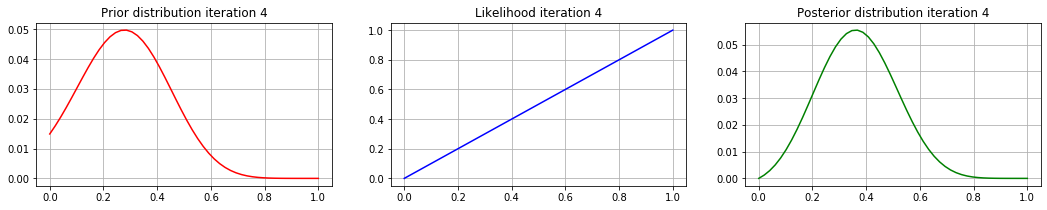

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 5
The coin fell on...heads !


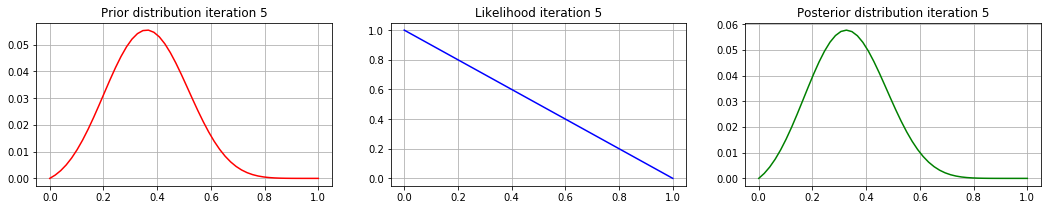

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 6
The coin fell on...heads !


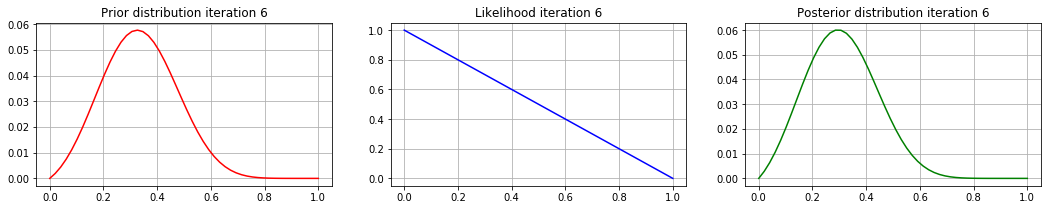

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 7
The coin fell on...tails !


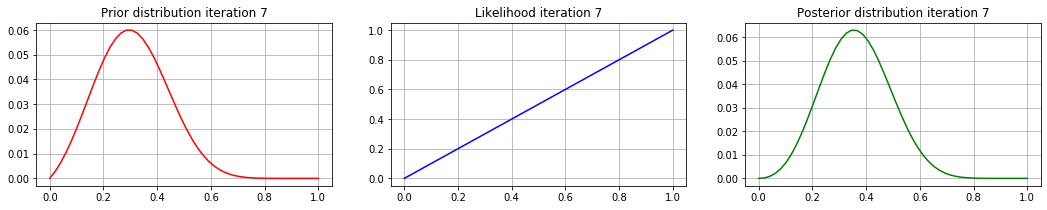

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 8
The coin fell on...heads !


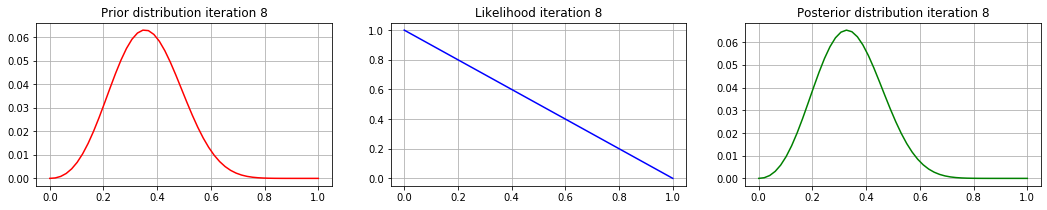

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 9
The coin fell on...heads !


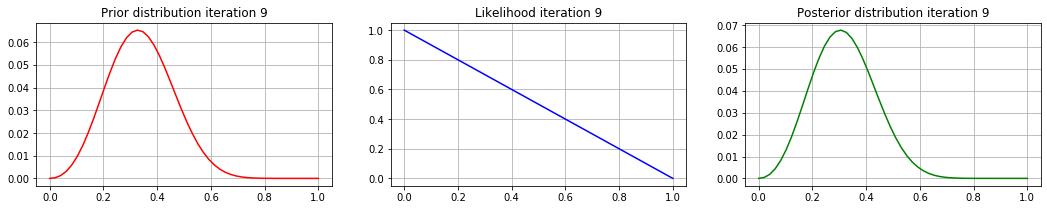

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 10
The coin fell on...tails !


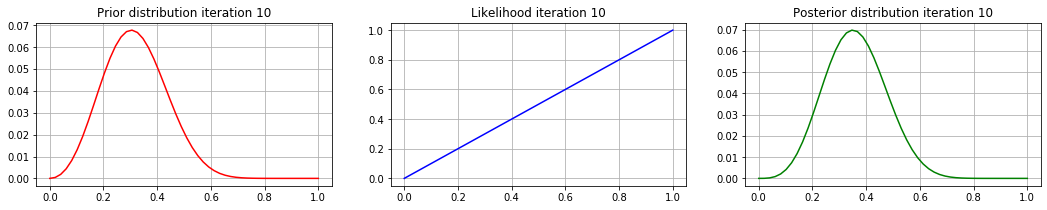

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 11
The coin fell on...tails !


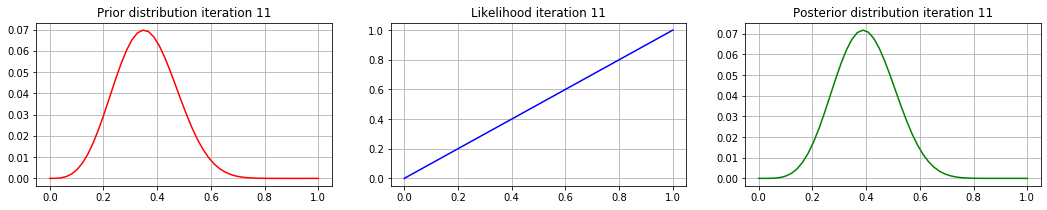

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 12
The coin fell on...heads !


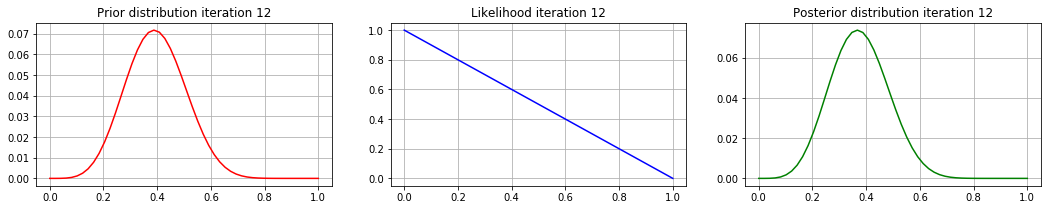

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 13
The coin fell on...heads !


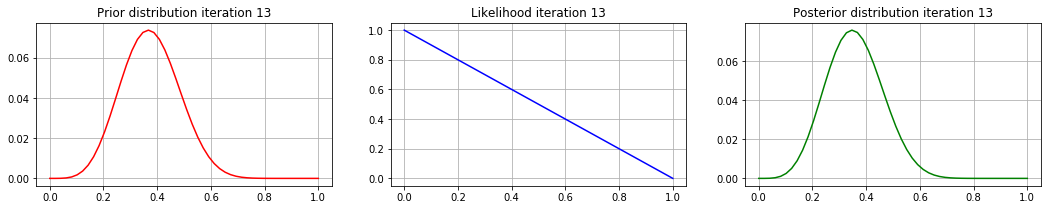

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 14
The coin fell on...heads !


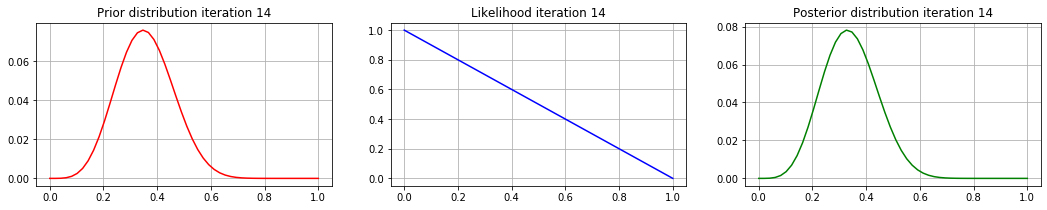

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 15
The coin fell on...heads !


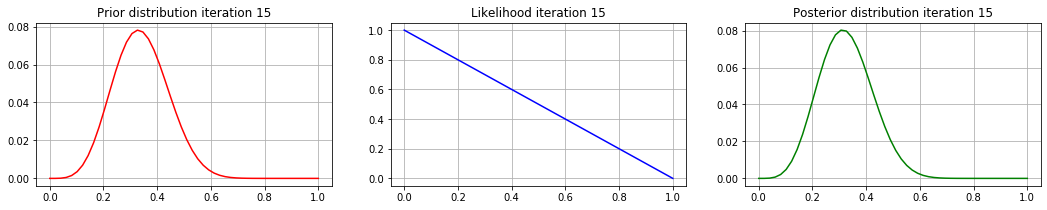

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 16
The coin fell on...heads !


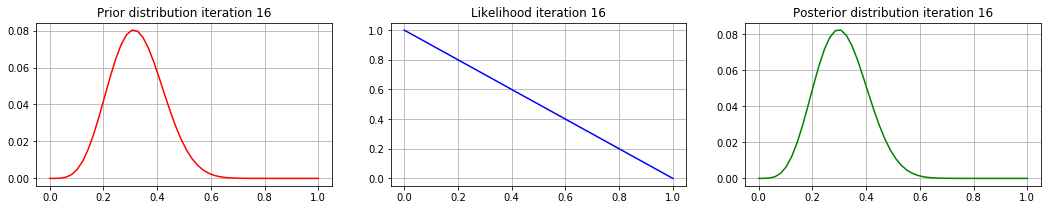

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 17
The coin fell on...heads !


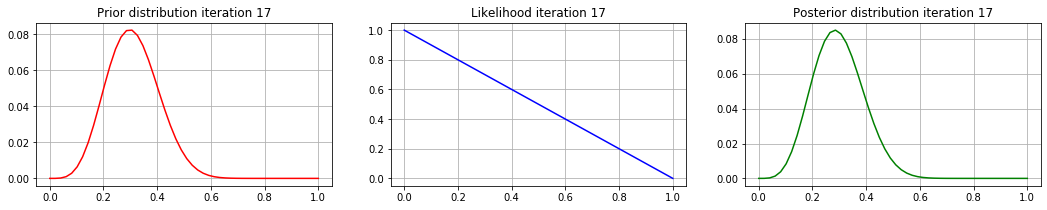

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 18
The coin fell on...heads !


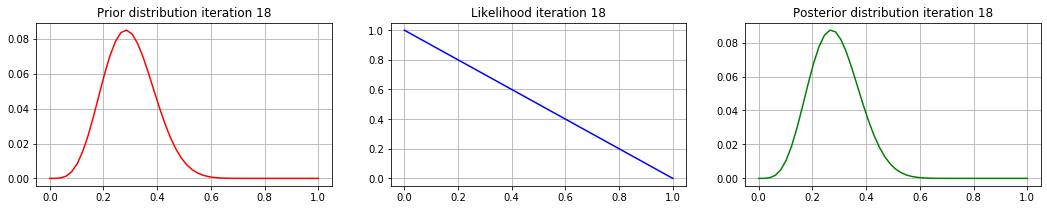

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 19
The coin fell on...heads !


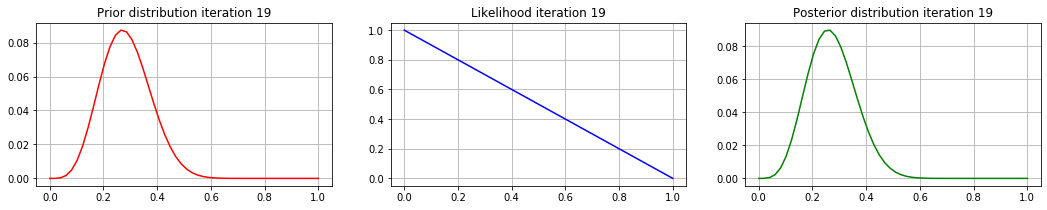

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 20
The coin fell on...tails !


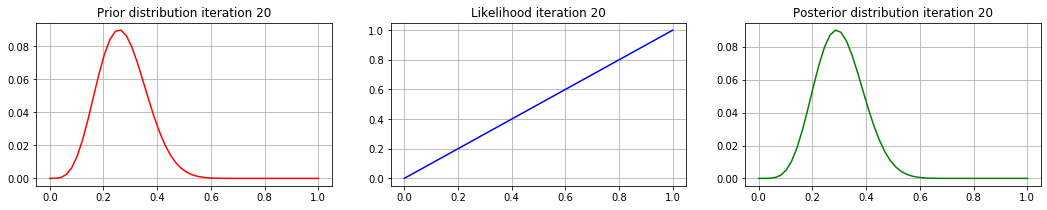

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 21
The coin fell on...heads !


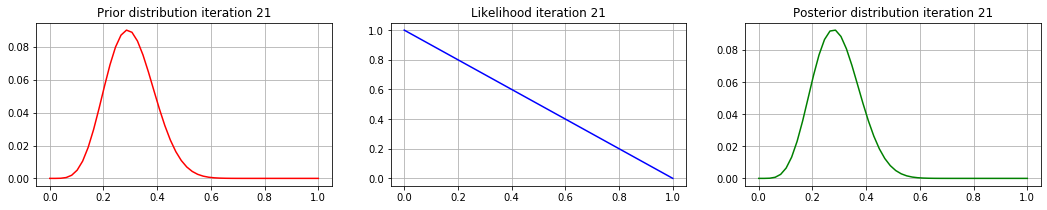

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 22
The coin fell on...heads !


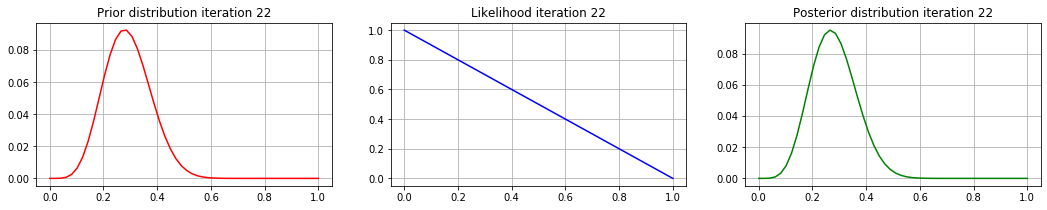

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 23
The coin fell on...tails !


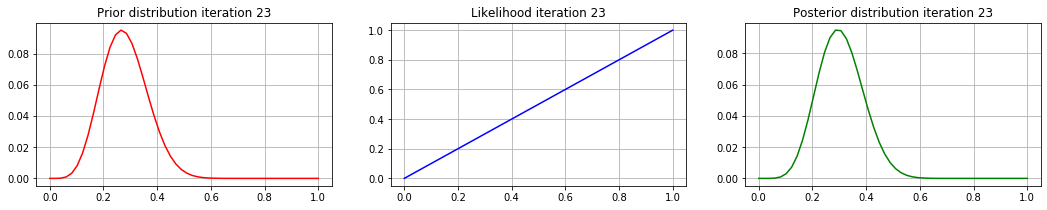

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 24
The coin fell on...heads !


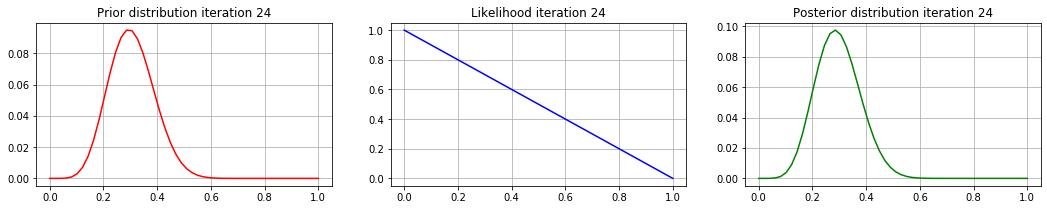

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 25
The coin fell on...tails !


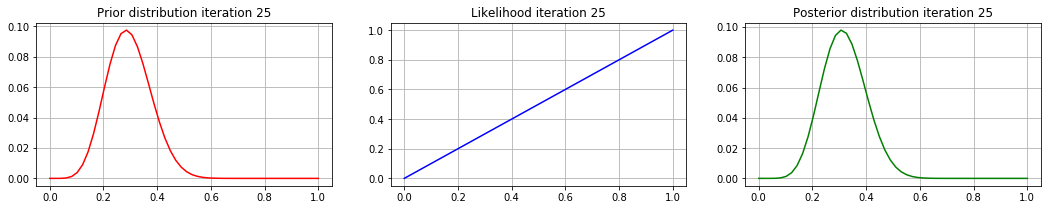

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 26
The coin fell on...tails !


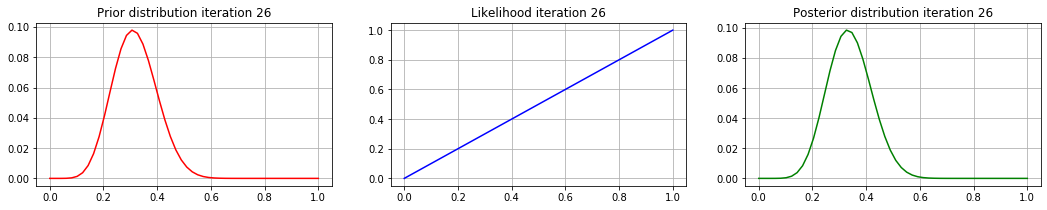

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 27
The coin fell on...heads !


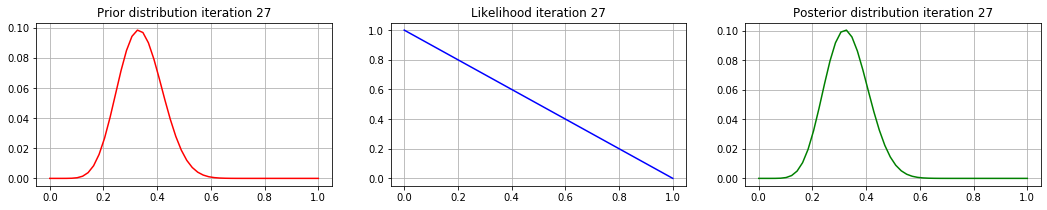

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 28
The coin fell on...heads !


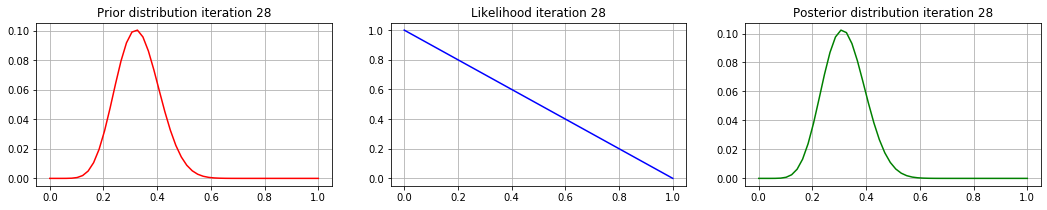

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 29
The coin fell on...tails !


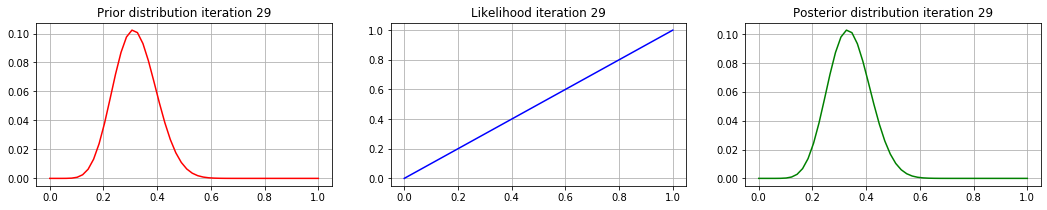

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 30
The coin fell on...heads !


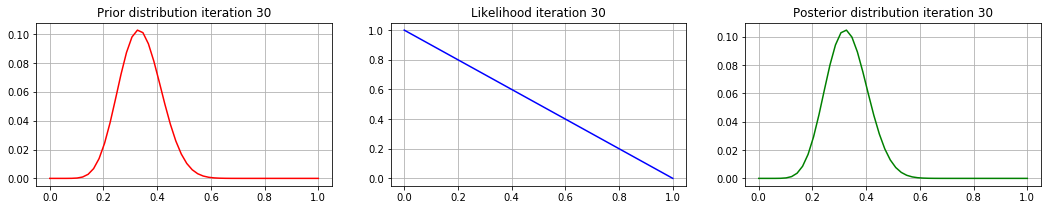

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 31
The coin fell on...heads !


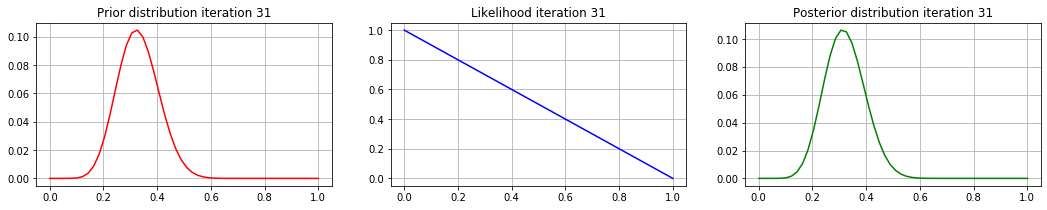

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 32
The coin fell on...tails !


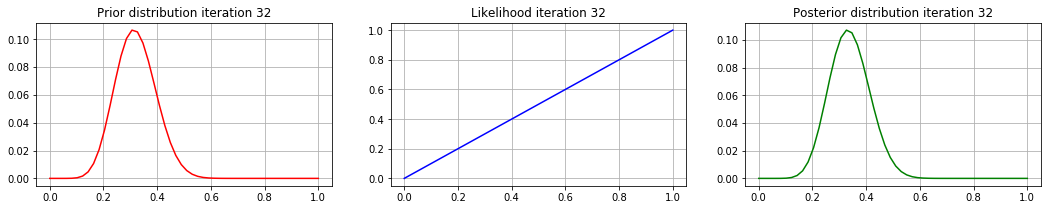

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 33
The coin fell on...heads !


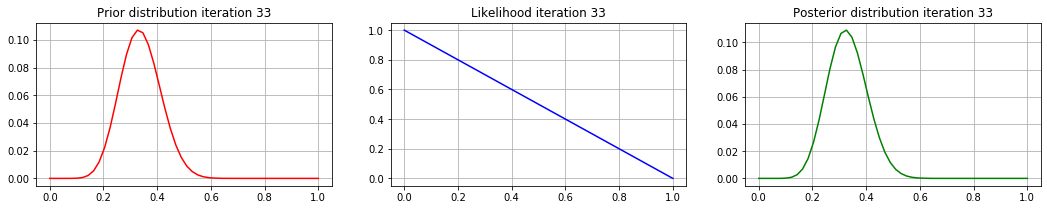

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 34
The coin fell on...heads !


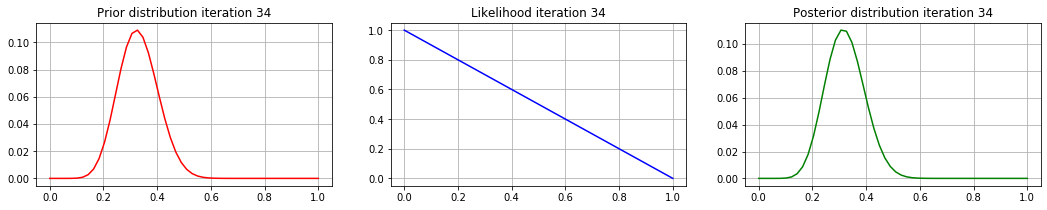

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 35
The coin fell on...tails !


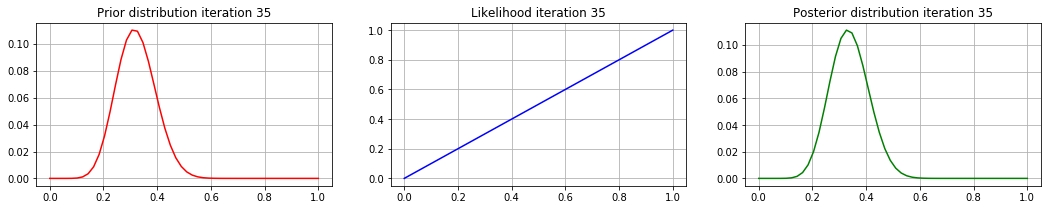

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 36
The coin fell on...tails !


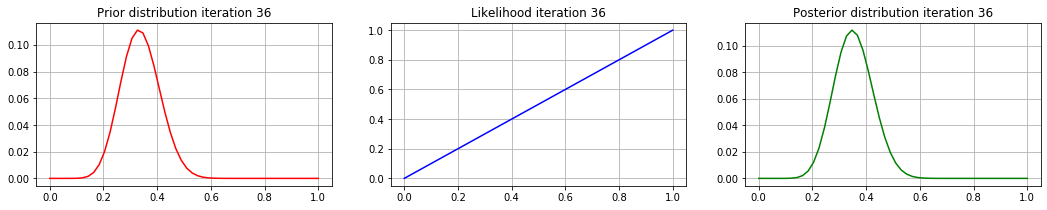

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 37
The coin fell on...heads !


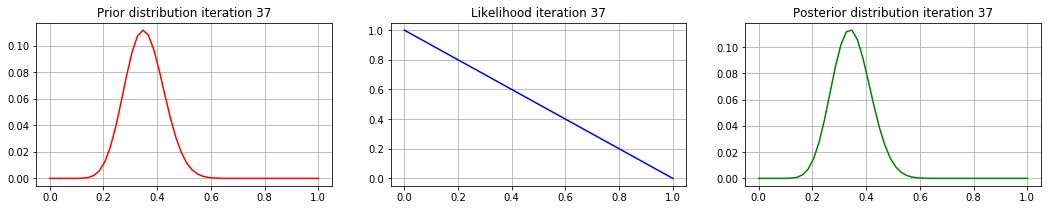

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 38
The coin fell on...heads !


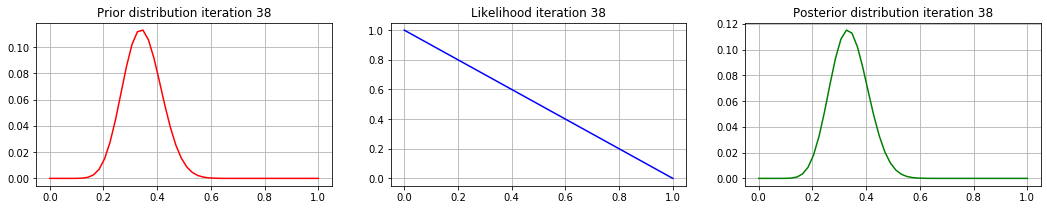

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 39
The coin fell on...tails !


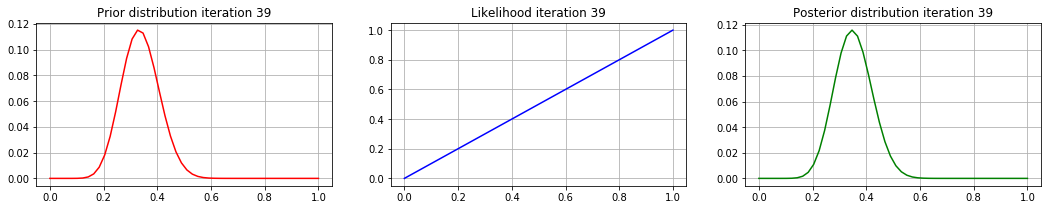

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 40
The coin fell on...tails !


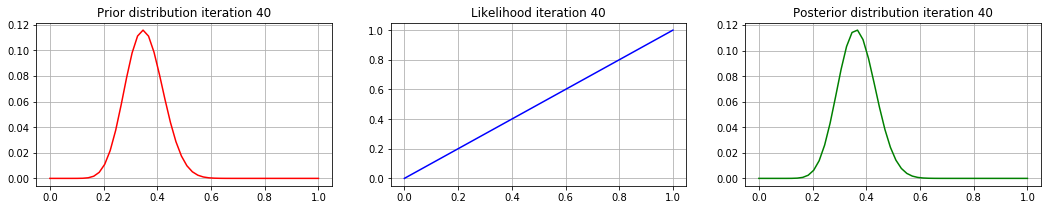

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 41
The coin fell on...heads !


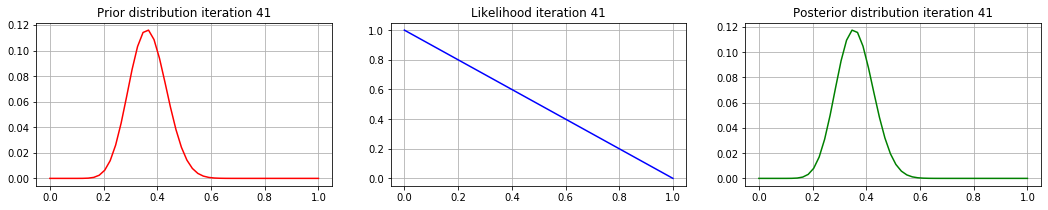

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 42
The coin fell on...tails !


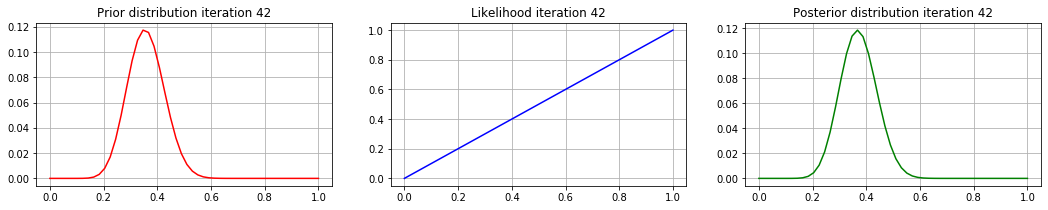

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 43
The coin fell on...heads !


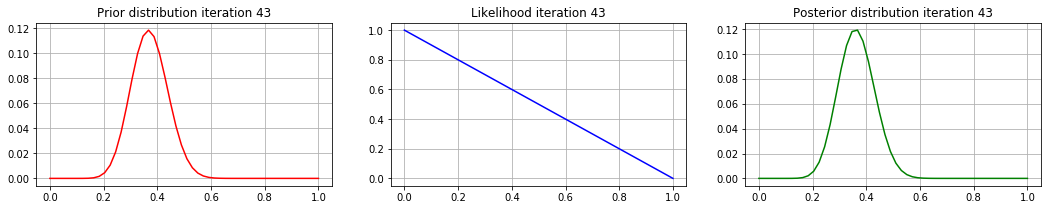

-------------------------------------------------------------------------------------------------------------------------------------------------
Iteration 44
The coin fell on...heads !


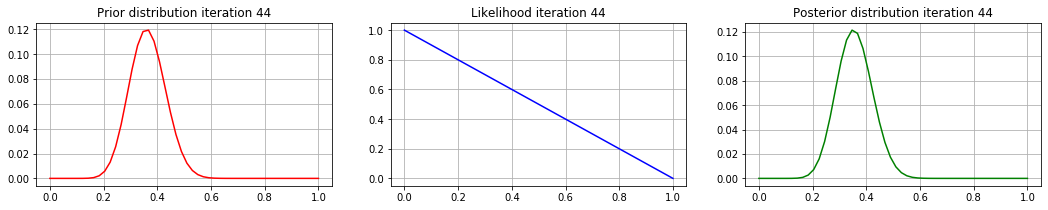

In [12]:
# a priori
theta = np.linspace(0, 1)
prior_distribution_theta = [gaussian(t, 0.5, 0.2) for t in theta]

# données
N_PILES=15
N_FACES=30
data = [1] * N_PILES + [0] * N_FACES
random.shuffle(data)

# itérations
message = "The coin fell on..."
for i, pile in enumerate(data):
    print("-" * 145)
    print("Iteration %i" % i)
    if pile:
        print(message + "tails !")
    else:
        print(message + "heads !")
    likelihood = [get_likelihood(pile, 1-pile, t) for t in theta]
    posterior_distribution_theta = one_step_bayes(likelihood, prior_distribution_theta, theta)
    # plot
    plt.figure(figsize=(18, 3))
    plt.subplot(131)
    plt.plot(theta, prior_distribution_theta, color='r')
    plt.grid()
    plt.title("Prior distribution iteration {}".format(i))
    plt.subplot(132)
    plt.plot(theta, likelihood, color='b')
    plt.grid()
    plt.title("Likelihood iteration {}".format(i))
    plt.subplot(133)
    plt.plot(theta, posterior_distribution_theta, color='g')
    plt.grid()
    plt.title("Posterior distribution iteration {}".format(i))
    plt.show()
    # update
    prior_distribution_theta = posterior_distribution_theta